# COUNTRY WISE GROWTH DATASET ML PREDICTION

The aim of this project is to analyze socio-political and economic indicators across various countries to understand their impact on overall stability, as measured by the 'Total' score. By leveraging machine learning techniques, we will develop a predictive model that identifies key factors contributing to national stability. Ultimately, the project aims to provide actionable insights for policymakers and researchers to enhance governance and societal resilience.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('FSI-2023-DOWNLOAD.csv')

In [3]:
dataset

,Country,Year,Rank,Total,S1: Demographic Pressures,S2: Refugees and IDPs,C3: Group Grievance,E3: Human Flight and Brain Drain,E2: Economic Inequality,E1: Economy,P1: State Legitimacy,P2: Public Services,P3: Human Rights,C1: Security Apparatus,C2: Factionalized Elites,X1: External Intervention
0,Somalia,2023,1st,111.9,10.0,9.0,8.7,8.6,9.1,9.5,9.6,9.8,9.0,9.5,10.0,9.1
1,Yemen,2023,2nd,108.9,9.6,9.6,8.8,6.4,7.9,9.9,9.8,9.6,9.6,8.6,9.9,9.2
2,South Sudan,2023,3rd,108.5,9.7,10.0,8.6,6.5,8.6,8.6,9.8,9.7,8.7,9.9,9.2,9.2
3,Congo Democratic Republic,2023,4th,107.2,9.7,9.8,9.4,6.4,8.4,8.1,9.3,9.3,9.3,8.8,9.6,9.1
4,Syria,2023,5th,107.1,7.4,9.1,9.1,8.0,6.5,9.6,10.0,9.0,9.1,9.4,9.9,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Switzerland,2023,175th,17.8,2.4,3.2,2.1,1.0,2.4,1.6,0.3,1.6,0.4,1.4,1.0,0.4
175,New Zealand,2023,176th,16.7,1.1,1.2,2.0,1.6,2.6,2.6,0.5,1.1,0.5,1.6,1.4,0.5
176,Finland,2023,177th,16.0,1.7,1.9,0.3,1.5,1.6,2.7,0.4,1.0,0.5,2.0,1.4,1.0
177,Iceland,2023,178th,15.7,1.5,1.5,0.5,1.6,1.5,2.6,0.4,0.9,0.4,0.4,1.8,2.6


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           179 non-null    object 
 1   Year                              179 non-null    int64  
 2   Rank                              179 non-null    object 
 3   Total                             179 non-null    float64
 4   S1: Demographic Pressures         179 non-null    float64
 5   S2: Refugees and IDPs             179 non-null    float64
 6   C3: Group Grievance               179 non-null    float64
 7   E3: Human Flight and Brain Drain  179 non-null    float64
 8   E2: Economic Inequality           179 non-null    float64
 9   E1: Economy                       179 non-null    float64
 10  P1: State Legitimacy              179 non-null    float64
 11  P2: Public Services               179 non-null    float64
 12  P3: Huma

In [5]:
dataset.isnull().sum()

Country                             0
Year                                0
Rank                                0
Total                               0
S1: Demographic Pressures           0
S2: Refugees and IDPs               0
C3: Group Grievance                 0
E3: Human Flight and Brain Drain    0
E2: Economic Inequality             0
E1: Economy                         0
P1: State Legitimacy                0
P2: Public Services                 0
P3: Human Rights                    0
C1: Security Apparatus              0
C2: Factionalized Elites            0
X1: External Intervention           0
dtype: int64

In [6]:
# Unique values in the 'Country' and 'Rank' columns
dataset['Country'].nunique()

179

In [7]:
dataset['Rank'].unique()

array(['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th',
       '10th', '11th', '12th', '13th', '14th', '15th', '16th', '17th',
       '18th', '19th', '20th', '21st', '22nd', '23rd', '24th', '25th',
       '26th', '27th', '28th', '29th', '30th', '31st', '32nd', '33rd',
       '34th', '35th', '36th', '37th', '38th', '39th', '40th', '41st',
       '42nd', '43rd', '44th', '45th', '46th', '47th', '48th', '49th',
       '50th', '51st', '52nd', '53rd', '54th', '55th', '56th', '57th',
       '58th', '59th', '60th', '61st', '62nd', '63rd', '64th', '65th',
       '66th', '67th', '68th', '69th', '70th', '71st', '72nd', '73rd',
       '74th', '75th', '76th', '77th', '78th', '79th', '80th', '81st',
       '82nd', '83rd', '84th', '85th', '86th', '87th', '88th', '89th',
       '90th', '91st', '92nd', '93rd', '94th', '95th', '96th', '97th',
       '98th', '99th', '100th', '103rd', '101st', '102nd', '104th',
       '105th', '106th', '107th', '108th', '109th', '110th', '111th',
       '112

# EDA

Text(0.5, 0.98, 'Distribution of Total Score')

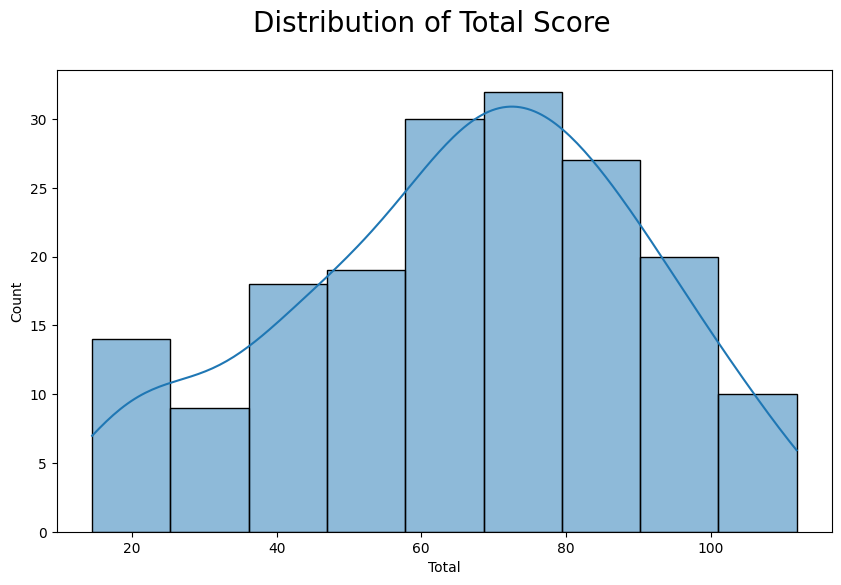

In [8]:
# Distribution of the 'Total' column
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Total'], kde=True)
plt.suptitle('Distribution of Total Score',fontsize=20)

Text(0.5, 0.98, 'Total Score vs. Demographic Pressures')

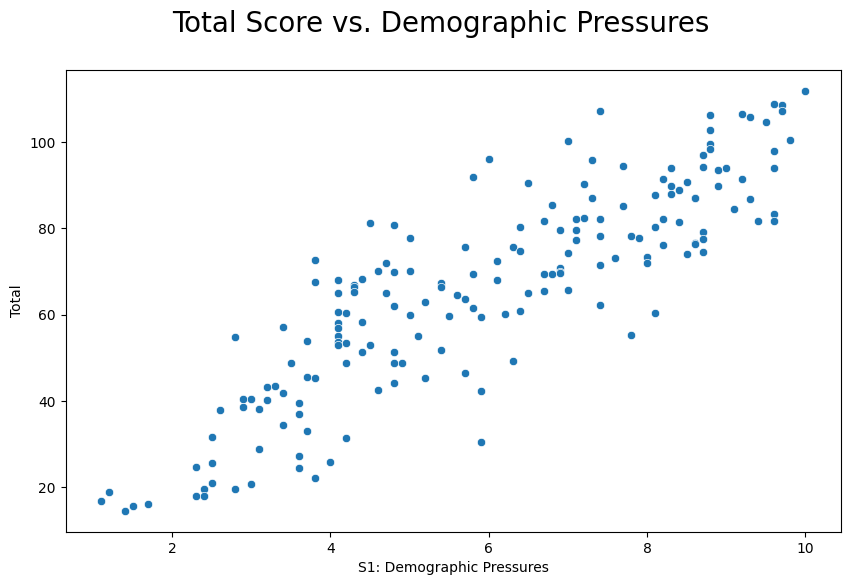

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='S1: Demographic Pressures', y='Total', data=dataset)
plt.suptitle('Total Score vs. Demographic Pressures',fontsize=20)

Text(0.5, 0.98, 'Total Score vs. Demographic Pressures')

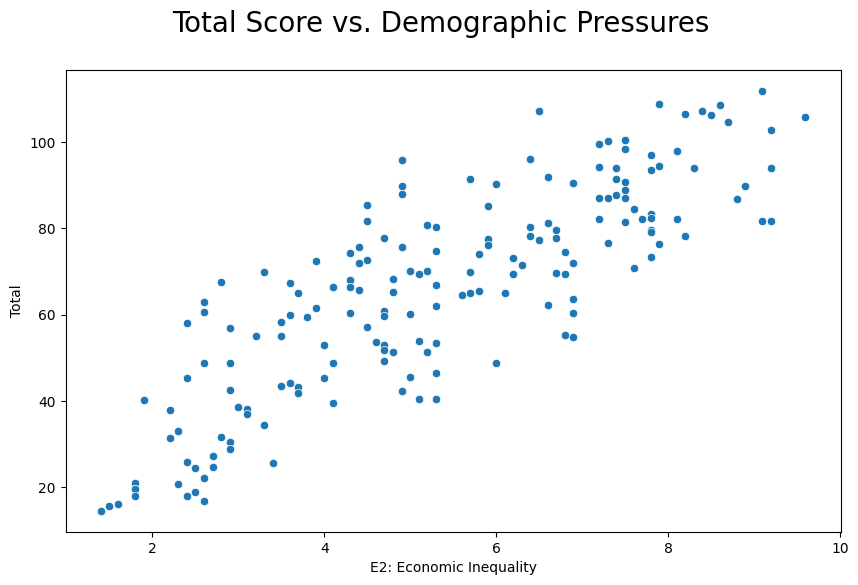

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='E2: Economic Inequality', y='Total', data=dataset)
plt.suptitle('Total Score vs. Demographic Pressures',fontsize=20)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'S1: Demographic Pressures'),
  Text(1, 0, 'E1: Economy'),
  Text(2, 0, 'P1: State Legitimacy'),
  Text(3, 0, 'C1: Security Apparatus')])

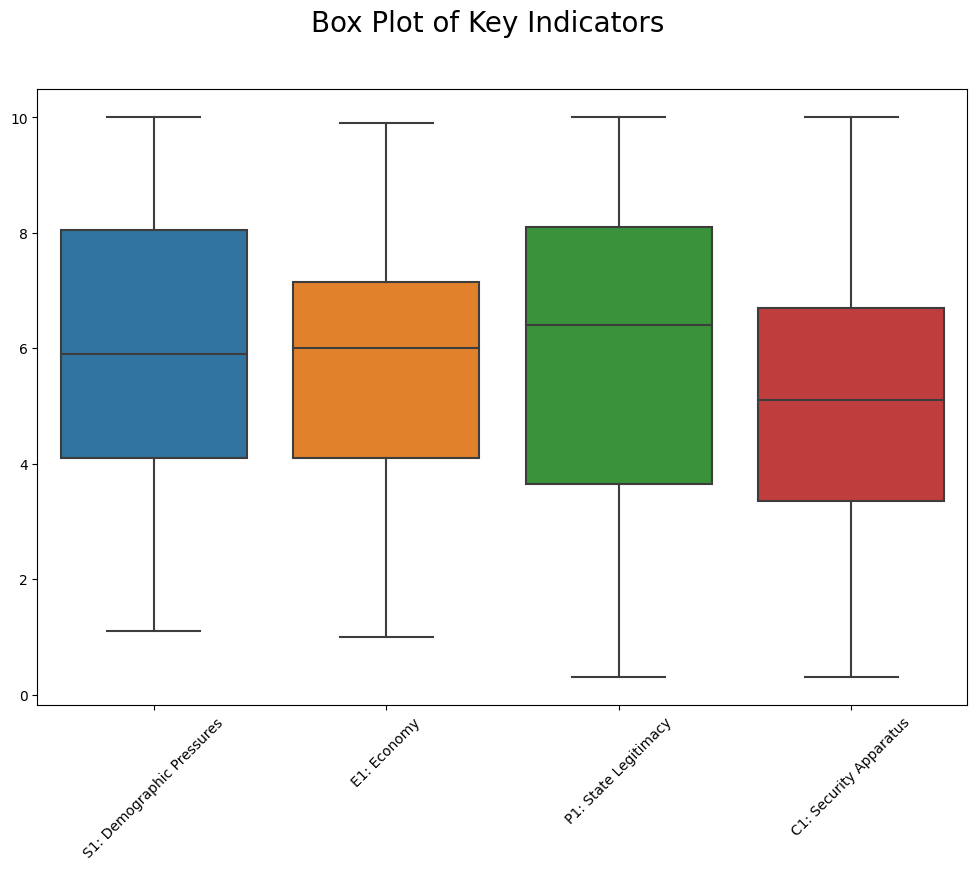

In [11]:
# Box plots to visualize the distribution and detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset[['S1: Demographic Pressures', 'E1: Economy', 'P1: State Legitimacy', 'C1: Security Apparatus']])
plt.suptitle('Box Plot of Key Indicators',fontsize=20)
plt.xticks(rotation=45)

Text(0.5, 0.98, 'Pairplot Analysis of the dataset.')

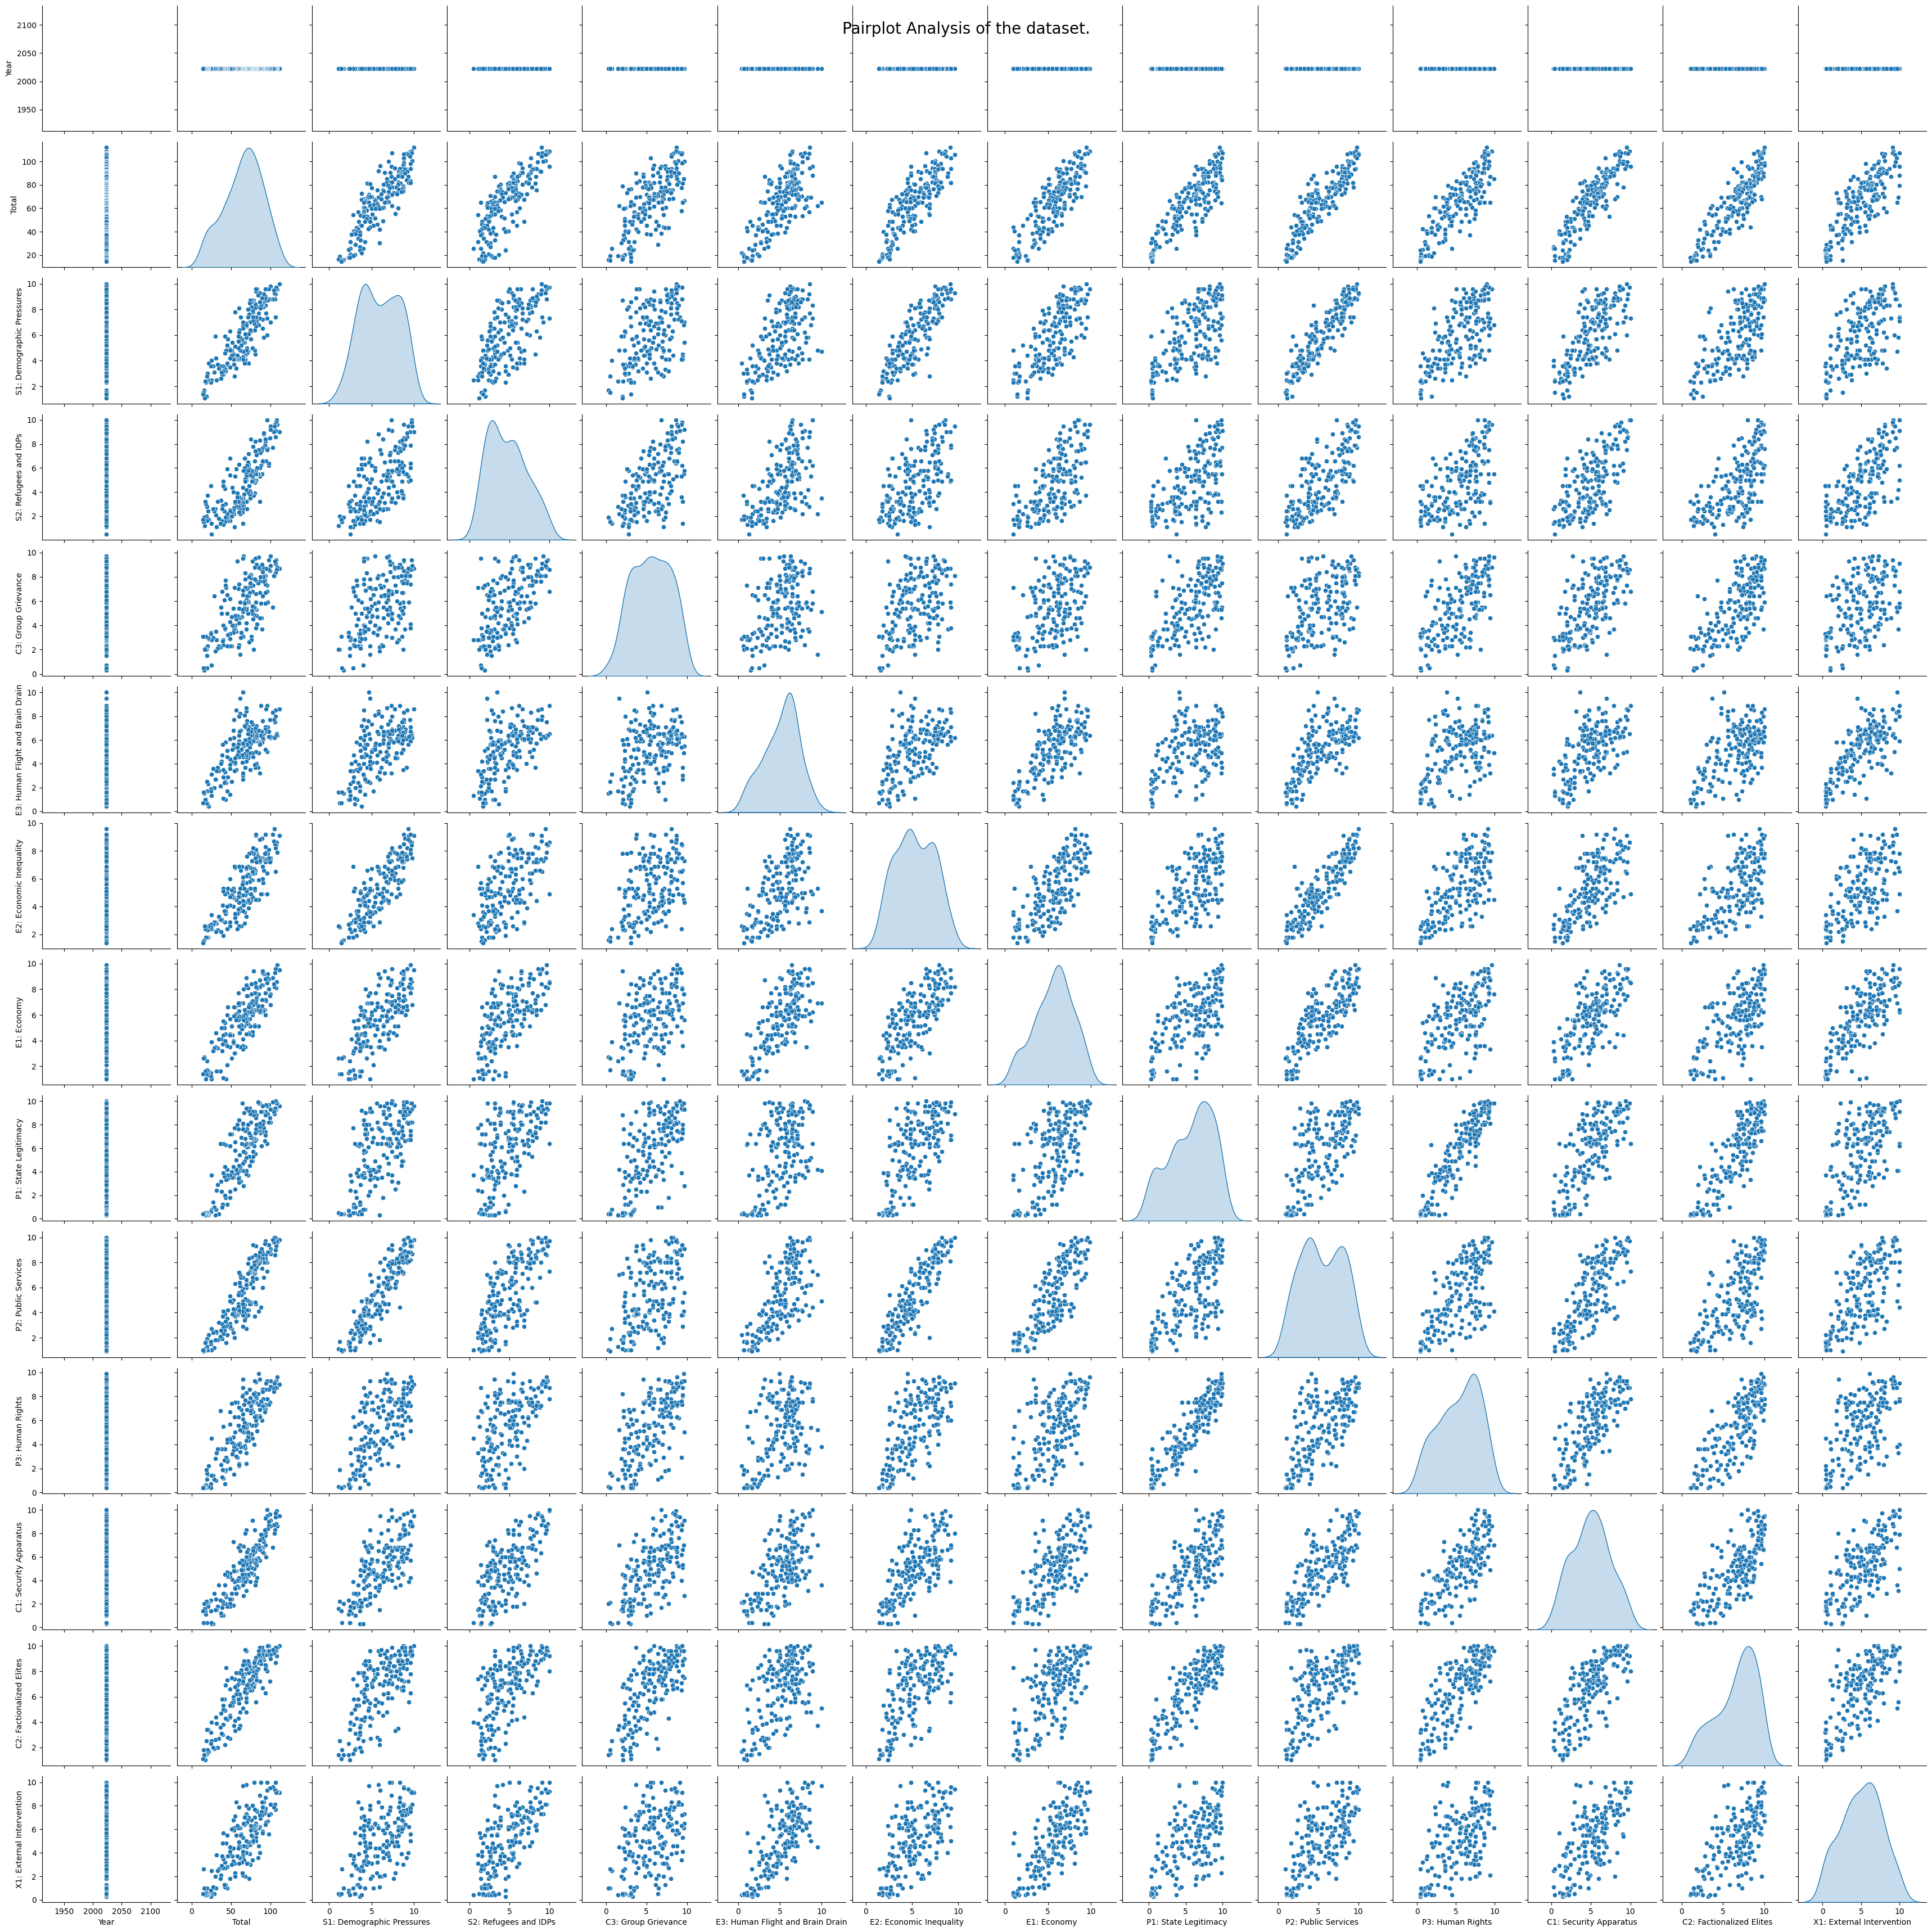

In [12]:
sns.pairplot(data=dataset,diag_kind='kde')
plt.suptitle('Pairplot Analysis of the dataset.',fontsize=20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9784\558205864.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')


Text(0.5, 0.98, 'Correlation of the dataset')

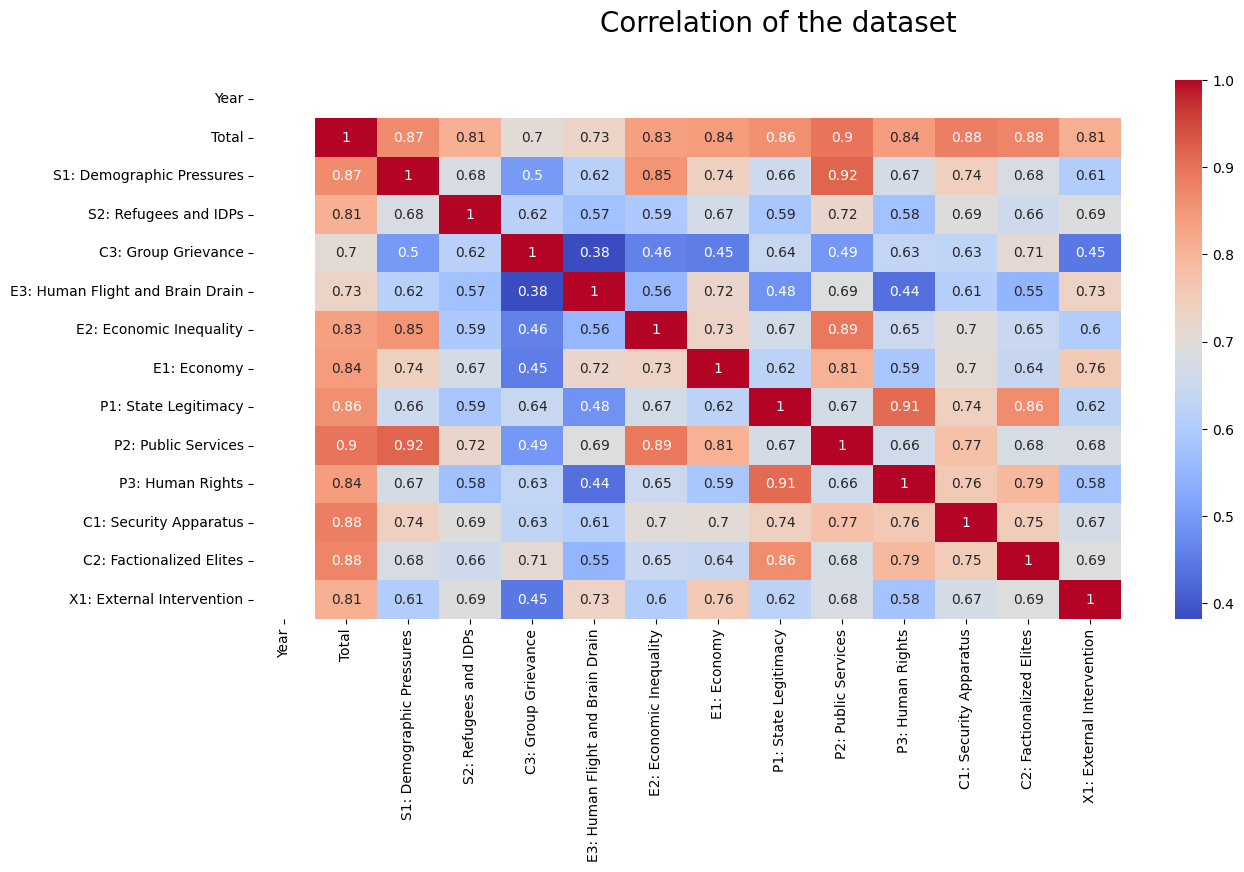

In [13]:
plt.figure(figsize=(14,7))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlation of the dataset',fontsize=20)

# OUTLIERS

Text(0.5, 0.98, 'Total outliers on the dataset')

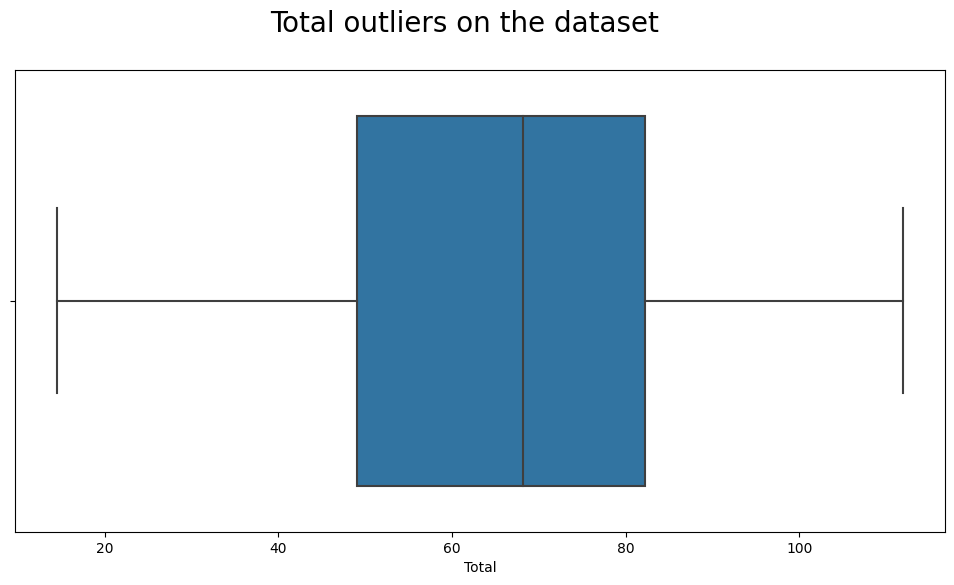

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='Total')
plt.suptitle('Total outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'Demographic Pressure outliers on the dataset')

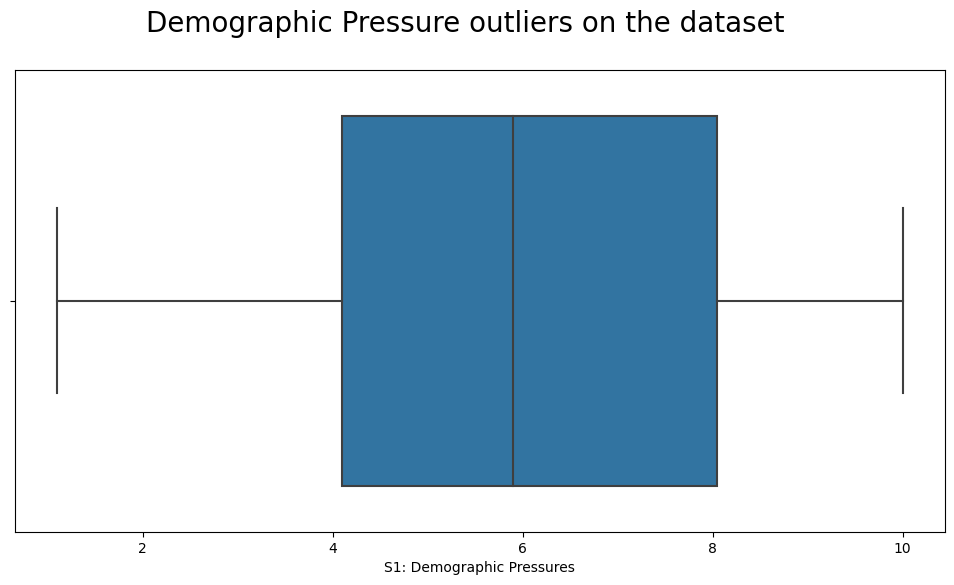

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='S1: Demographic Pressures')
plt.suptitle('Demographic Pressure outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'Refugees and IDPs outliers on the dataset')

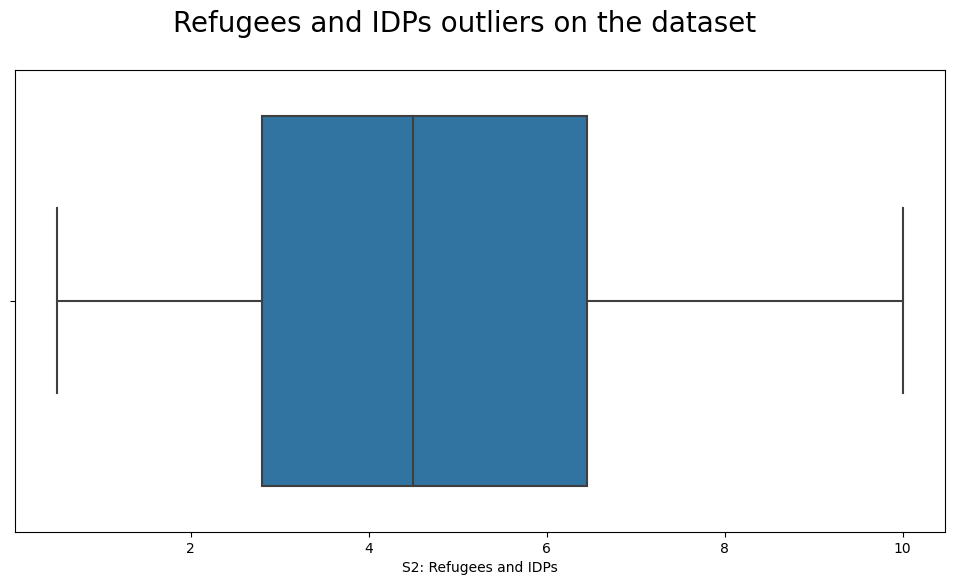

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='S2: Refugees and IDPs')
plt.suptitle('Refugees and IDPs outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'Group Grievance outliers on the dataset')

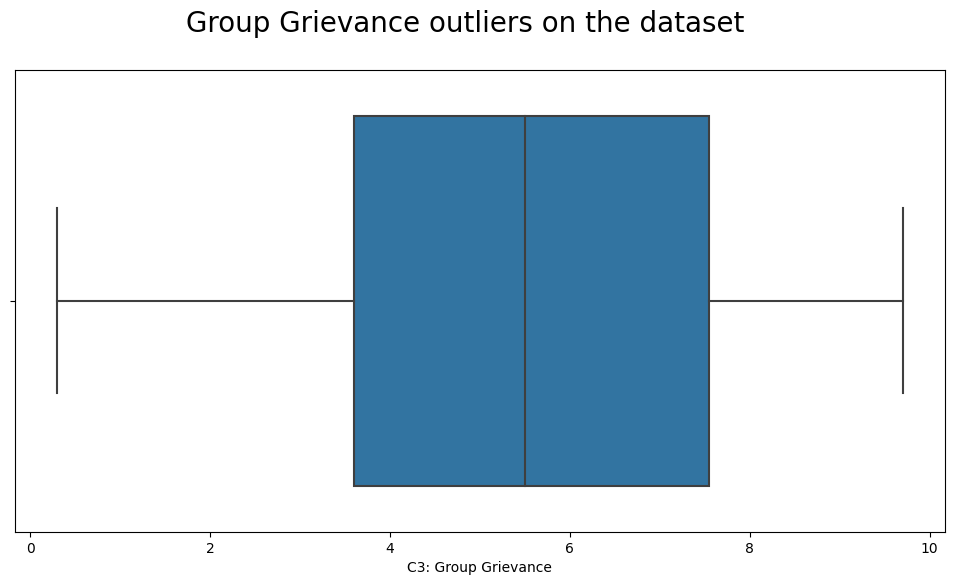

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='C3: Group Grievance')
plt.suptitle('Group Grievance outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'Human Flight and Brain Drain outliers on the dataset')

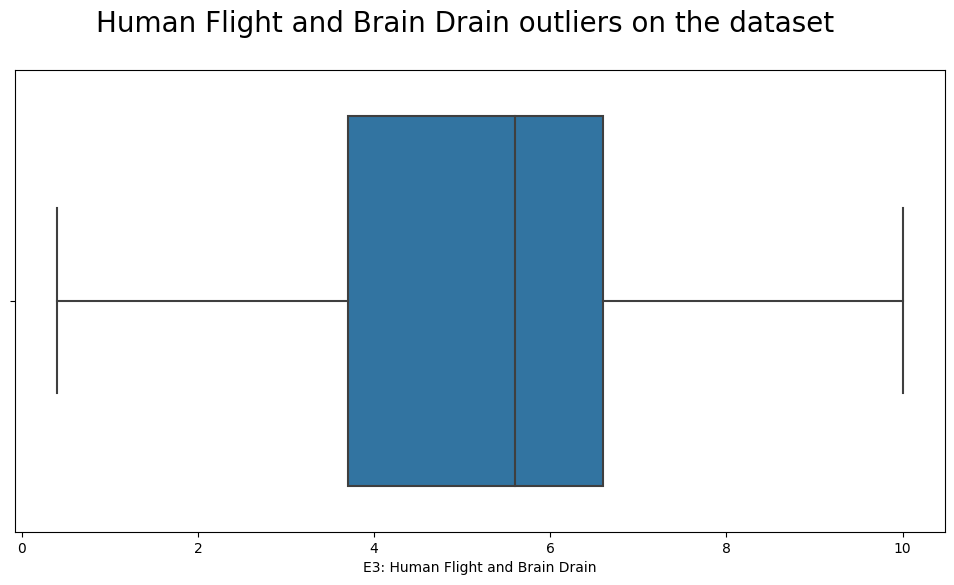

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='E3: Human Flight and Brain Drain')
plt.suptitle('Human Flight and Brain Drain outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'Economic Inequality outliers on the dataset')

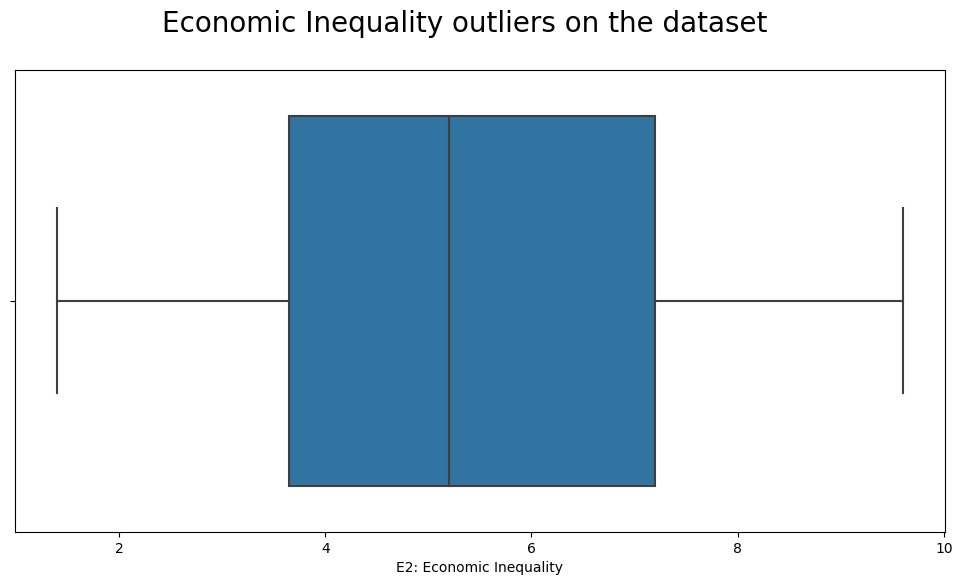

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='E2: Economic Inequality')
plt.suptitle('Economic Inequality outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'Economic outliers on the dataset')

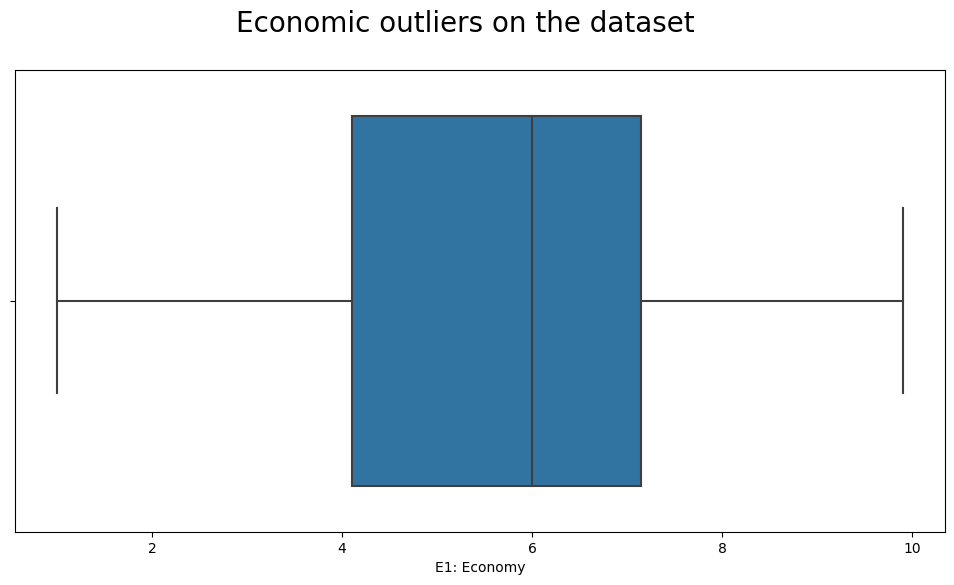

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='E1: Economy')
plt.suptitle('Economic outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'State Legitimacy outliers on the dataset')

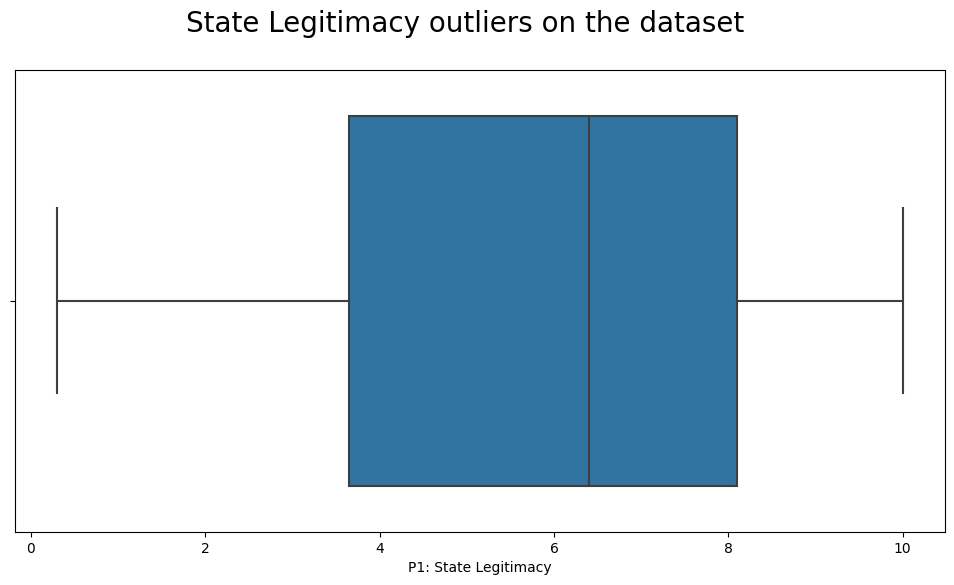

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='P1: State Legitimacy')
plt.suptitle('State Legitimacy outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'Public services outliers on the dataset')

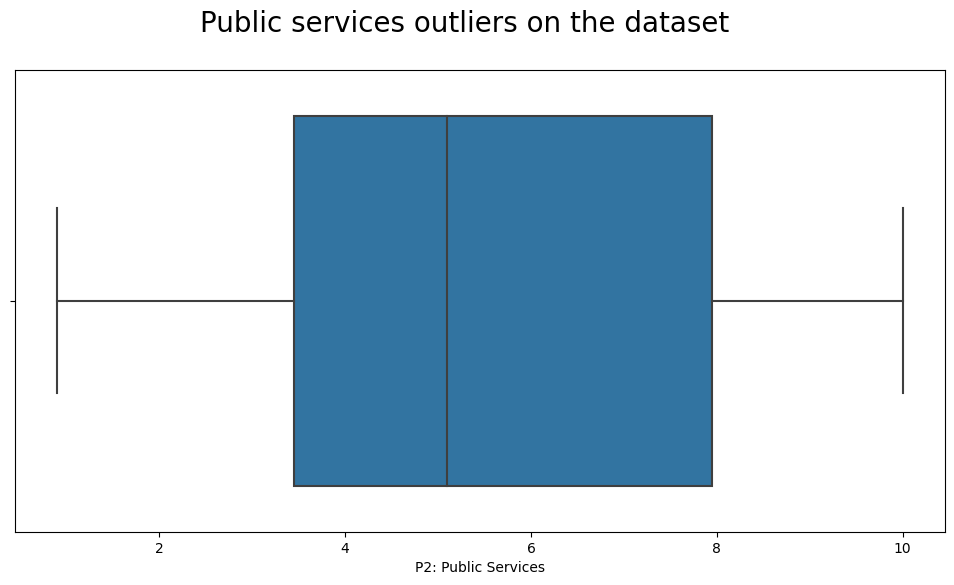

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='P2: Public Services')
plt.suptitle('Public services outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'Human Rights outliers on the dataset')

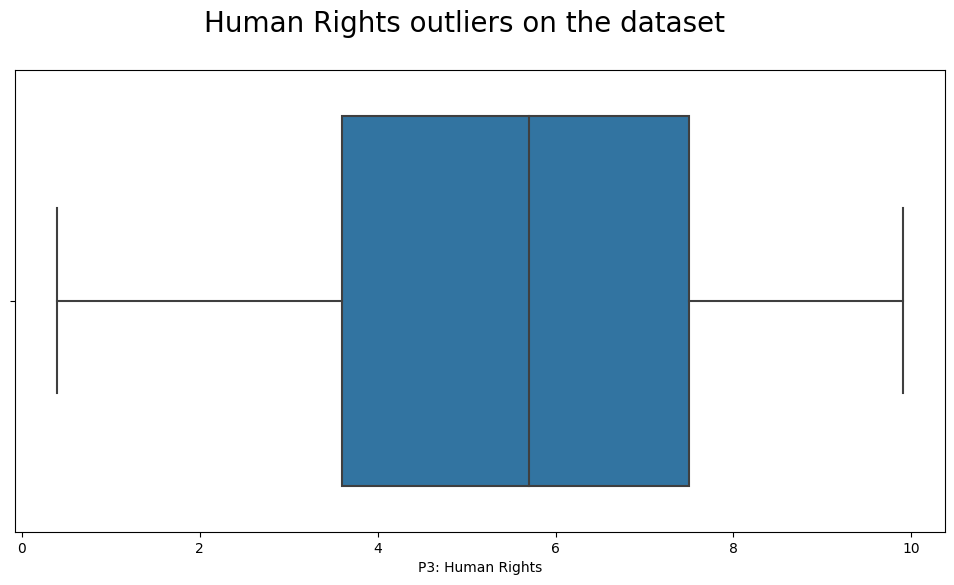

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='P3: Human Rights')
plt.suptitle('Human Rights outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'Security apparatus outliers on the dataset')

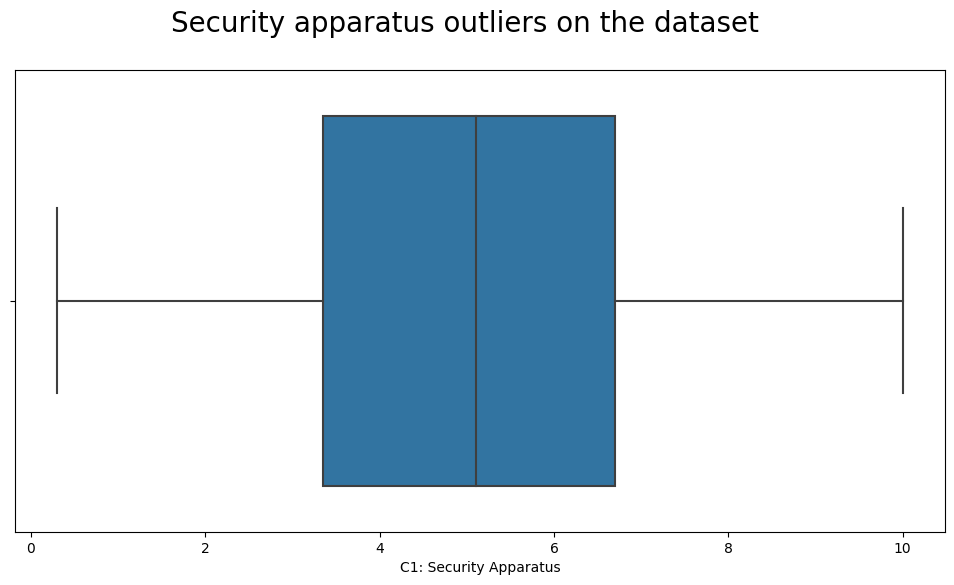

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='C1: Security Apparatus')
plt.suptitle('Security apparatus outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'Factionalized outliers on the dataset')

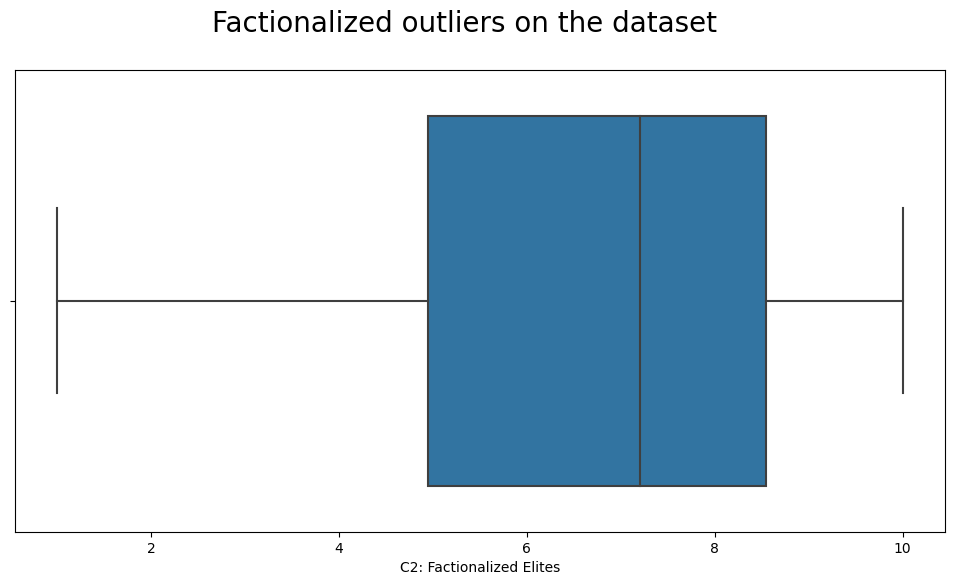

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='C2: Factionalized Elites')
plt.suptitle('Factionalized outliers on the dataset',fontsize=20)

Text(0.5, 0.98, 'External Intervention outliers on the dataset')

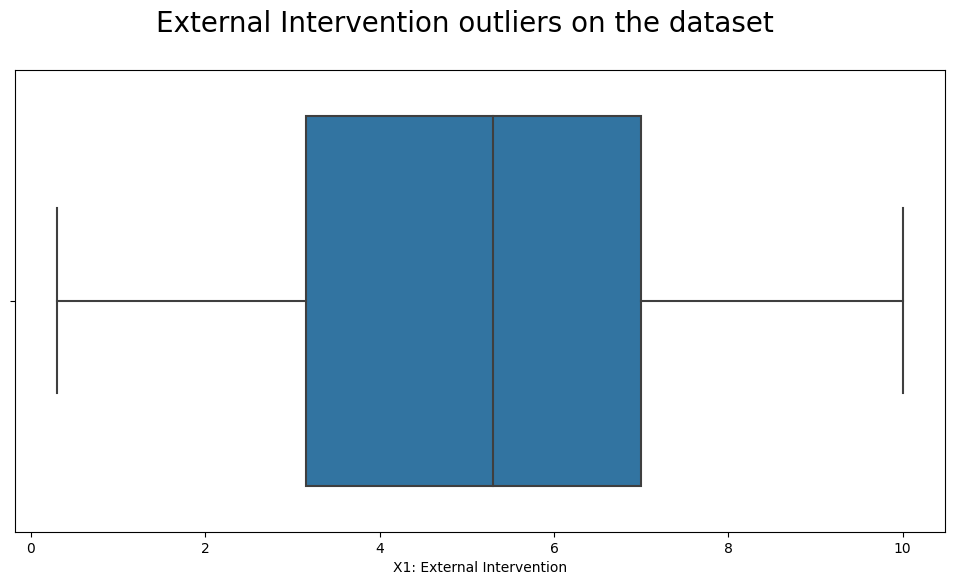

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset,x='X1: External Intervention')
plt.suptitle('External Intervention outliers on the dataset',fontsize=20)

# Fitting the data to the model

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [28]:
std=StandardScaler()
lab=LabelEncoder()

In [29]:
dataset['Year']=std.fit_transform(dataset['Year'].values.reshape(-1,1))
dataset['Total']=std.fit_transform(dataset['Total'].values.reshape(-1,1))
dataset['S1: Demographic Pressures']=std.fit_transform(dataset['S1: Demographic Pressures'].values.reshape(-1,1))
dataset['S2: Refugees and IDPs']=std.fit_transform(dataset['S2: Refugees and IDPs'].values.reshape(-1,1))
dataset['C3: Group Grievance']=std.fit_transform(dataset['C3: Group Grievance'].values.reshape(-1,1))
dataset['E3: Human Flight and Brain Drain']=std.fit_transform(dataset['E3: Human Flight and Brain Drain'].values.reshape(-1,1))
dataset['E2: Economic Inequality']=std.fit_transform(dataset['E2: Economic Inequality'].values.reshape(-1,1))
dataset['E1: Economy']=std.fit_transform(dataset['E1: Economy'].values.reshape(-1,1))
dataset['P1: State Legitimacy']=std.fit_transform(dataset['P1: State Legitimacy'].values.reshape(-1,1))
dataset['P2: Public Services']=std.fit_transform(dataset['P2: Public Services'].values.reshape(-1,1))
dataset['P3: Human Rights']=std.fit_transform(dataset['P3: Human Rights'].values.reshape(-1,1))
dataset['C1: Security Apparatus']=std.fit_transform(dataset['C1: Security Apparatus'].values.reshape(-1,1))
dataset['C2: Factionalized Elites']=std.fit_transform(dataset['C2: Factionalized Elites'].values.reshape(-1,1))
dataset['X1: External Intervention']=std.fit_transform(dataset['X1: External Intervention'].values.reshape(-1,1))

In [30]:
dataset['Country']=lab.fit_transform(dataset['Country'])
dataset['Rank']=lab.fit_transform(dataset['Rank'])

In [31]:
x=dataset.drop(columns=['Total'])
y=dataset['Total']

# **Splitting the dataset**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# **Importing the machine learning model and fitting the dataset**

In [34]:
#Importing the machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [35]:
model_1=LinearRegression()

In [36]:
model_1.fit(x_train,y_train)

LinearRegression()

In [37]:
model_1.score(x_train,y_train)

1.0

In [38]:
y_pred_1=model_1.predict(x_test)

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,median_absolute_error

In [40]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_1))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_1))
print('R2_score',r2_score(y_test,y_pred_1))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_1))

Mean_Squared_error 9.891615879730853e-27
Mean_Absolute_error 8.716937280020234e-14
R2_score 1.0
Median_absolute_error 8.920642002863133e-14


In [41]:
model_2=DecisionTreeRegressor()

In [42]:
model_2.fit(x_train,y_train)

DecisionTreeRegressor()

In [43]:
model_2.score(x_train,y_train)

1.0

In [44]:
y_pred_2=model_2.predict(x_test)

In [45]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_2))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_2))
print('R2_score',r2_score(y_test,y_pred_2))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_2))

Mean_Squared_error 0.12869599092774908
Mean_Absolute_error 0.16729204566306177
R2_score 0.8534537627739383
Median_absolute_error 0.0753162892007857


In [46]:
model_3=SVR()

In [47]:
model_3.fit(x_train,y_train)

SVR()

In [48]:
model_3.score(x_train,y_train)

0.24991483585143304

In [49]:
y_pred_3=model_3.predict(x_test)

In [50]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_3))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_3))
print('R2_score',r2_score(y_test,y_pred_3))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_3))

Mean_Squared_error 0.6211566307200905
Mean_Absolute_error 0.5642683656502301
R2_score 0.2926884023049985
Median_absolute_error 0.3552830786720189


In [51]:
model_4=RandomForestRegressor()

In [52]:
model_4.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
model_4.score(x_train,y_train)

0.9961682005302482

In [54]:
y_pred_4=model_4.predict(x_test)

In [55]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_4))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_4))
print('R2_score',r2_score(y_test,y_pred_4))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_4))

Mean_Squared_error 0.028849235218268283
Mean_Absolute_error 0.10659269555161392
R2_score 0.9671493506704472
Median_absolute_error 0.069353749639056


In [56]:
model_5=KNeighborsRegressor()

In [57]:
model_5.fit(x_train,y_train)

KNeighborsRegressor()

In [58]:
model_5.score(x_train,y_train)

0.598639150071131

In [59]:
y_pred_5=model_5.predict(x_test)

In [60]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_5))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_5))
print('R2_score',r2_score(y_test,y_pred_5))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_5))

Mean_Squared_error 0.4477047890287076
Mean_Absolute_error 0.42293350793799156
R2_score 0.4901981658692184
Median_absolute_error 0.25230956882263167


In [61]:
model_6=GradientBoostingRegressor()

In [62]:
model_6.fit(x_train,y_train)

GradientBoostingRegressor()

In [63]:
model_6.score(x_train,y_train)

0.9999189278098244

In [64]:
y_pred_6=model_6.predict(x_test)

In [65]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_6))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_6))
print('R2_score',r2_score(y_test,y_pred_6))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_6))

Mean_Squared_error 0.025671622386517864
Mean_Absolute_error 0.10982037493504558
R2_score 0.9707677011761416
Median_absolute_error 0.08567865675278014


In [66]:
model_7=XGBRegressor()

In [67]:
model_7.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [68]:
model_7.score(x_train,y_train)

0.9999996161327607

In [69]:
y_pred_7=model_7.predict(x_test)

In [70]:
print('Mean_Squared_error',mean_squared_error(y_test,y_pred_7))
print('Mean_Absolute_error',mean_absolute_error(y_test,y_pred_7))
print('R2_score',r2_score(y_test,y_pred_7))
print('Median_absolute_error',median_absolute_error(y_test,y_pred_7))

Mean_Squared_error 0.04151401017331274
Mean_Absolute_error 0.12776036830790213
R2_score 0.9527279603722941
Median_absolute_error 0.08243507538101819


# **Visualizing the training performance**

In [71]:
#Let's enter the model name and the performance detail's
model_name=['Linear_regression','Decision_tree_Regressor','SVR','Random_forest_Regressor','KNN','Gradient_boost','XGBoost']
model_train_performance=[model_1.score(x_train,y_train),model_2.score(x_train,y_train),model_3.score(x_train,y_train),model_4.score(x_train,y_train),model_5.score(x_train,y_train),model_6.score(x_train,y_train),model_7.score(x_train,y_train)]

In [72]:
print('The Training score of Linear Regression is:',model_1.score(x_train,y_train))
print('The Training score of Decision Tree is:',model_2.score(x_train,y_train))
print('The Training score of Random Forest is:',model_3.score(x_train,y_train))
print('The Training score of KNN is:',model_4.score(x_train,y_train))
print('The Training score of SVM is:',model_5.score(x_train,y_train))
print('The Training score of GradientBoost is:',model_6.score(x_train,y_train))
print('The Training score of XGBoost is:',model_7.score(x_train,y_train))

The Training score of Linear Regression is: 1.0
The Training score of Decision Tree is: 1.0
The Training score of Random Forest is: 0.24991483585143304
The Training score of KNN is: 0.9961682005302482
The Training score of SVM is: 0.598639150071131
The Training score of GradientBoost is: 0.9999189278098244
The Training score of XGBoost is: 0.9999996161327607


Text(0.5, 0.98, 'Training Score Of Each Model')

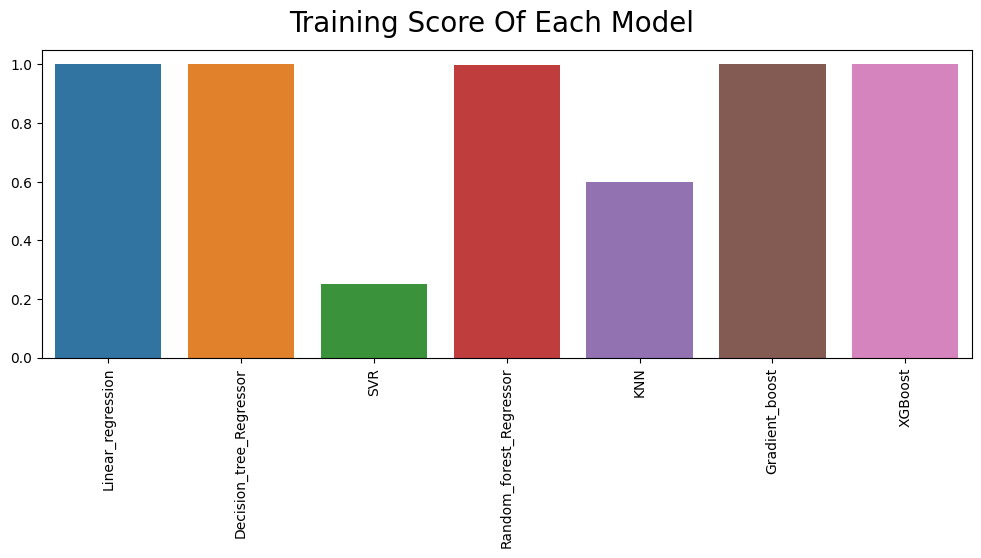

In [73]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_train_performance)
plt.xticks(rotation=90)
plt.suptitle('Training Score Of Each Model',fontsize=20)

# **Testing performance of each model**

In [74]:
model_test_performance=[r2_score(y_test,y_pred_1),r2_score(y_test,y_pred_2),r2_score(y_test,y_pred_3),r2_score(y_test,y_pred_4),r2_score(y_test,y_pred_5),r2_score(y_test,y_pred_6),r2_score(y_test,y_pred_7)]

In [75]:
print('The Testing score of Linear Regression is:',r2_score(y_test,y_pred_1))
print('The Testing score of Decision Tree is:',r2_score(y_test,y_pred_2))
print('The Testing score of SVM is:',r2_score(y_test,y_pred_3))
print('The Testing score of Random Forest is:',r2_score(y_test,y_pred_4))
print('The Testing score of KNN is:',r2_score(y_test,y_pred_5))
print('The Testing score of GradientBoost is:',r2_score(y_test,y_pred_6))
print('The Testing score of XGBoost is:',r2_score(y_test,y_pred_7))

The Testing score of Linear Regression is: 1.0
The Testing score of Decision Tree is: 0.8534537627739383
The Testing score of SVM is: 0.2926884023049985
The Testing score of Random Forest is: 0.9671493506704472
The Testing score of KNN is: 0.4901981658692184
The Testing score of GradientBoost is: 0.9707677011761416
The Testing score of XGBoost is: 0.9527279603722941


Text(0.5, 0.98, 'Testing Score Of Each Model')

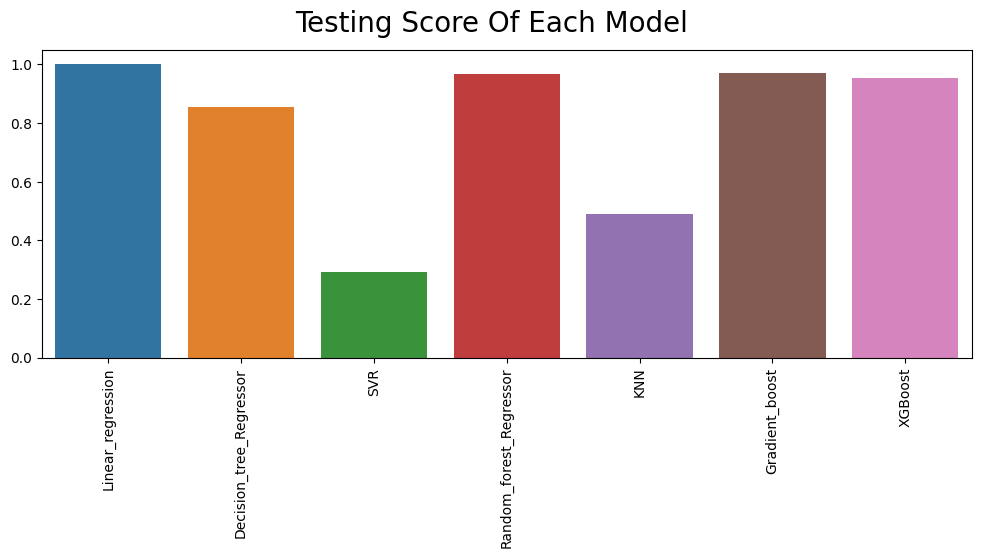

In [76]:
plt.figure(figsize=(12,4))
sns.barplot(x=model_name,y=model_test_performance)
plt.xticks(rotation=90)
plt.suptitle('Testing Score Of Each Model',fontsize=20)